### Ridge Regression
- also known as **"L2 Regularization"**
- used to Reduce Overfitting (when train data accuracy is very high but test data is very poor)
- **How it is reducing ovrefitting, because it is reducing the impact by reducing the value of coefficient of the feature that are not directly correlated with the output feature**
- in order to reduce the overfitting in the linear regression, we use Ridge regression algorithm

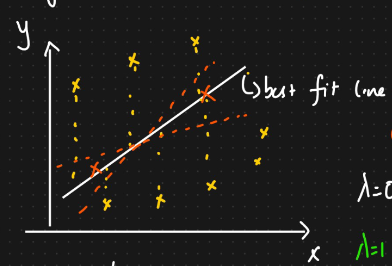
- a new algorithm which actually help us to hyperparameter tune the linear regression
- overfitting means our cost function is becoming zero, so to avoid the overfitting we will make sure that cost function will never become zero by adding hyperparameter(λ) and summation of slope squares (coefficient square)

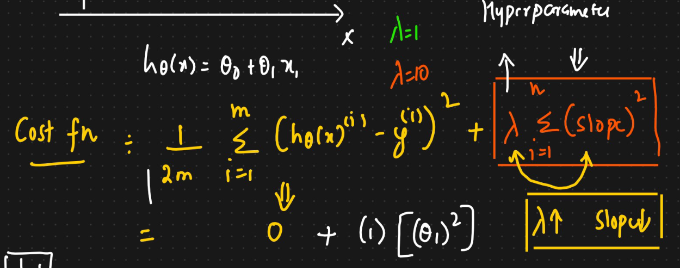

### IMP: Relationship between λ and slope square
- **when λ is increasing, slope is decreasing**
- remember slope or coefficient value will never become zero, as we keep on increasing the λ
- when λ=0, then liner regression is getting applied and not ridge regression and additional ridge part become zero
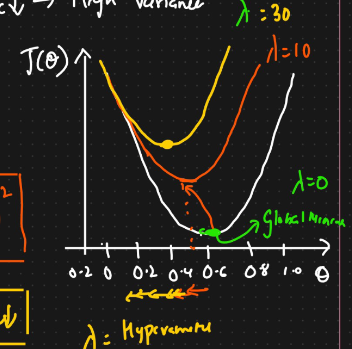

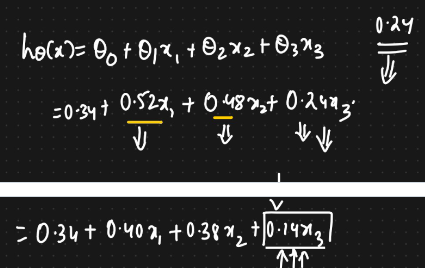

### Lasso Regression 
- also known as **"L1 Regularization"**
- it is used for **"feature selection"**
- features selection means feature that are not very important will get automatically deleted and features which are important stays
- here in cost function will add λ and summation of magnitude of slopes or coefficient
- in lasso regression, as we keep on increasing λ value, slope will decrease and after some point the not important feature slope becomes 0
- so when we are having more number of features and we want to select only the important feature, we can use lasso regression

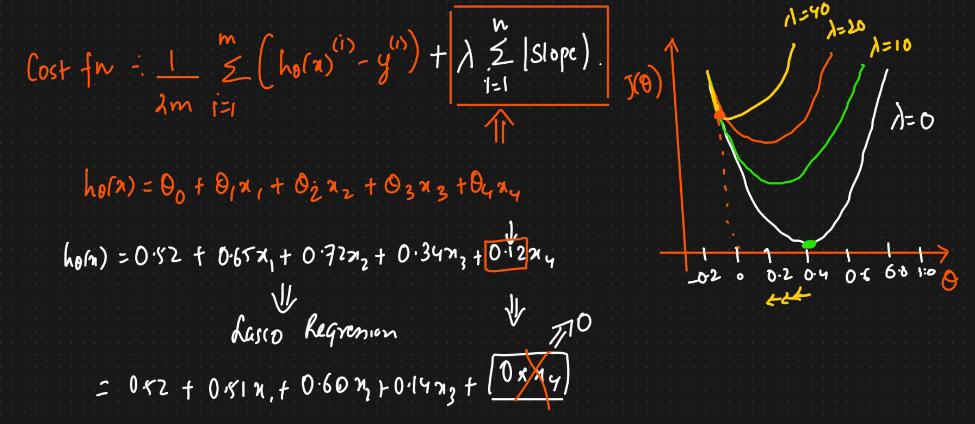

### ElasticNet Regression
- combination of both Ridge and Lasso Regression
- so here we reduce overfitting and do feature selection

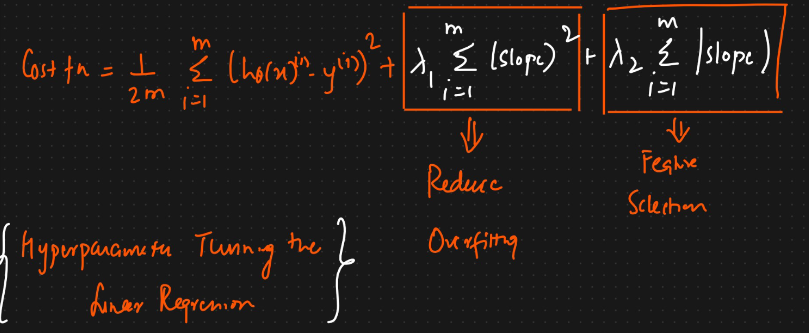

NOTE: **all these ridge, lasso and elasticnet for doing hyperparameter tuning the linear regression**

## Types of Cross Validation
- as we know, will split our dataset in train and test dataset and then again the train dataset, we split in train and validation dataset
- so for splitting train dataset in train and validation dataset, will use cross validation techniques
- there is one important thing i.e. **"random_state"** so as we change the value of random state will get different train and validation dataset 
    - **Leave One Out Cross Validation (LOOCV)**
    - **Leave P Out Cross Validation (LPOCV)**
    - **K Fold Cross Validation**
    - **Stratified K Fold Cross Validation**
    - **Time Series Cross Validation**

### Leave One Out Cross Validation
- so in this, whatever total number of records in training dataset will be having, will do that experiment and find out the accuracy of model that number of times 
- in each experiment, will take one by one, only one record as validation dataset and rest become training dataset for that experiment or iteration
- Disadvantages:
    - as dataset increases, complexity of training model increases and also number of experiment or iteration also increases
    - major is overfitting, as our validation data size is very low (only one at each experiment) and training dataset is larger which will have high accuarcy so when will test with new test dataset, accuracy will go down resulting in overfitting

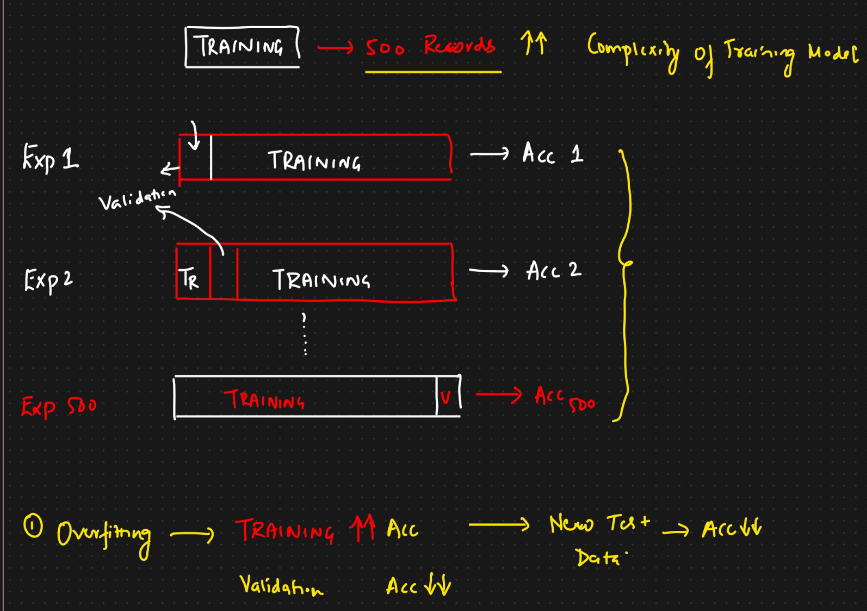

### Leave P Out Cross Validation
- in this, every thing is same as Leave One Out Cross Validation
- only difference here is instead of one out, here we can assign P any value like p=10, p=20 or whatever and split the training and validation dataset

### K Fold Cross Validation
- here will take some value of K suppose 5 and n is the total records which we want to split in training and validation
- will find out test size as : test_size = n/K here will get 100
- so in each experiment will take 100 records as validation and rest as training dataset
- Disadvantage:
    - there might be a case where in validation dataset only one type or group of data will come specially in binary classification problem suppose, only 1's or only 0's are there in records of validation 

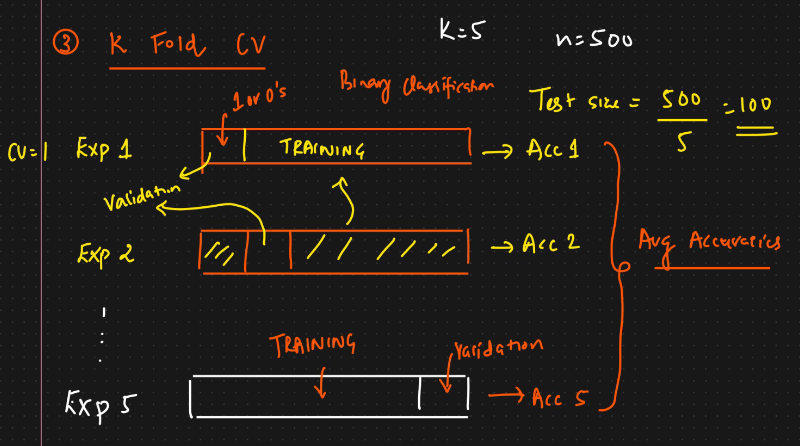

### Stratified K Fold Cross Validation
- to overcome the problem of K Fold CV, this Stratified K Fold CV come-up
- it make sure that whatever validation we are doing with different different K values, whatever records are coming under validation dataset will have equal amount of each data or output
- suppose in case or 1's and 0's, it will make sure that validation dataset of 100 if K=5 and n=500 will have balanced record of both 1's and 0's

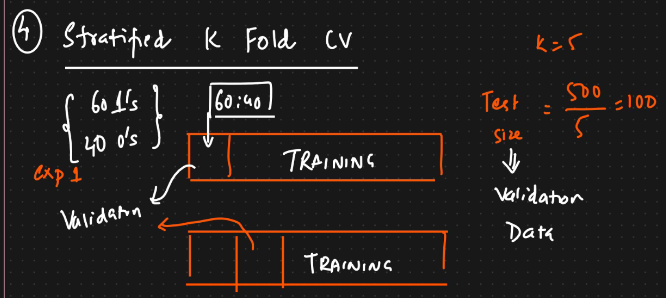

### Time Series Cross Validation
- here the cross validation will happen based on days or some time
- we cann't randomly pick days, it should be continuous
- will apply this in time series application like reviews, product sentiment analysis system

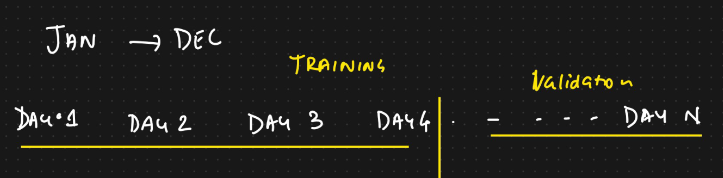

## Practical of Ridge, Lasso, ELasticNet with feature engineering and EDA
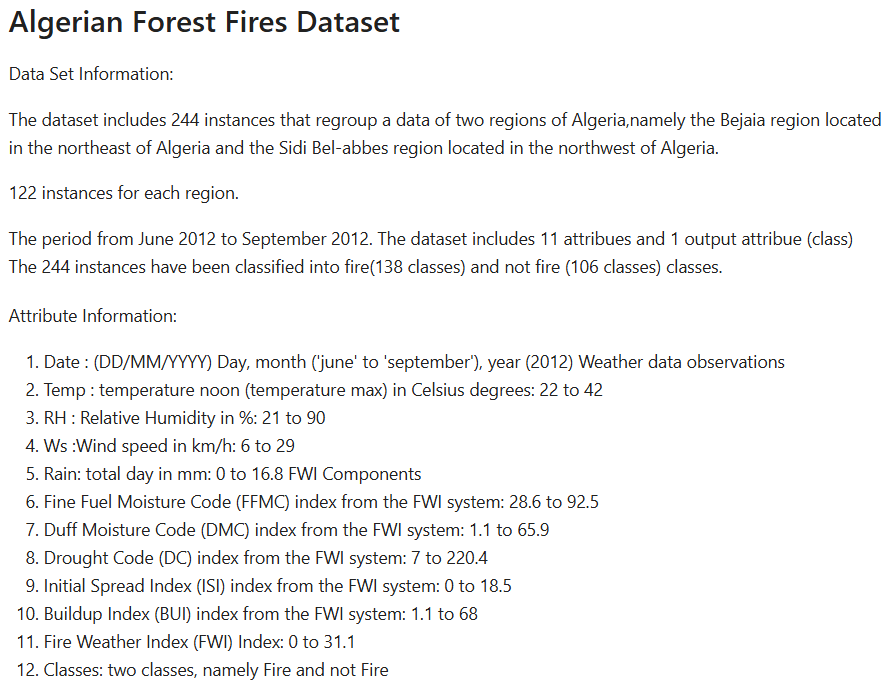

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

in the dataset, two region are present with haeder of their name so first removing the top header of one region using header=1 and then will remove the second header of region to merge the complete dataset

In [3]:
df=pd.read_csv('../files/Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


the dataset is converted into two sets based pn region from 122th index, we can make a new column based on region:
- 0 for bejaia region
- 1 for sidi-bel abbes region

In [7]:
df.loc[:122,"region"]=0
df.loc[122:,"region"]=1
df[['region']]=df[['region']].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [9]:
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [10]:
df=df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


fixing spaces in column names

In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [12]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [13]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [14]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [15]:
df.to_csv('../files/Algerian_forest_fires_dataset_cleaned.csv',index=False)

### EDA and Feature Engineering

In [16]:
df_copy=df.drop(['day','month','year'],axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df_copy.Classes=df_copy.Classes.str.strip()
df_copy.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [18]:
df_copy['Classes']=df_copy['Classes'].map({
    'fire':1,
    'not fire':0
})
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


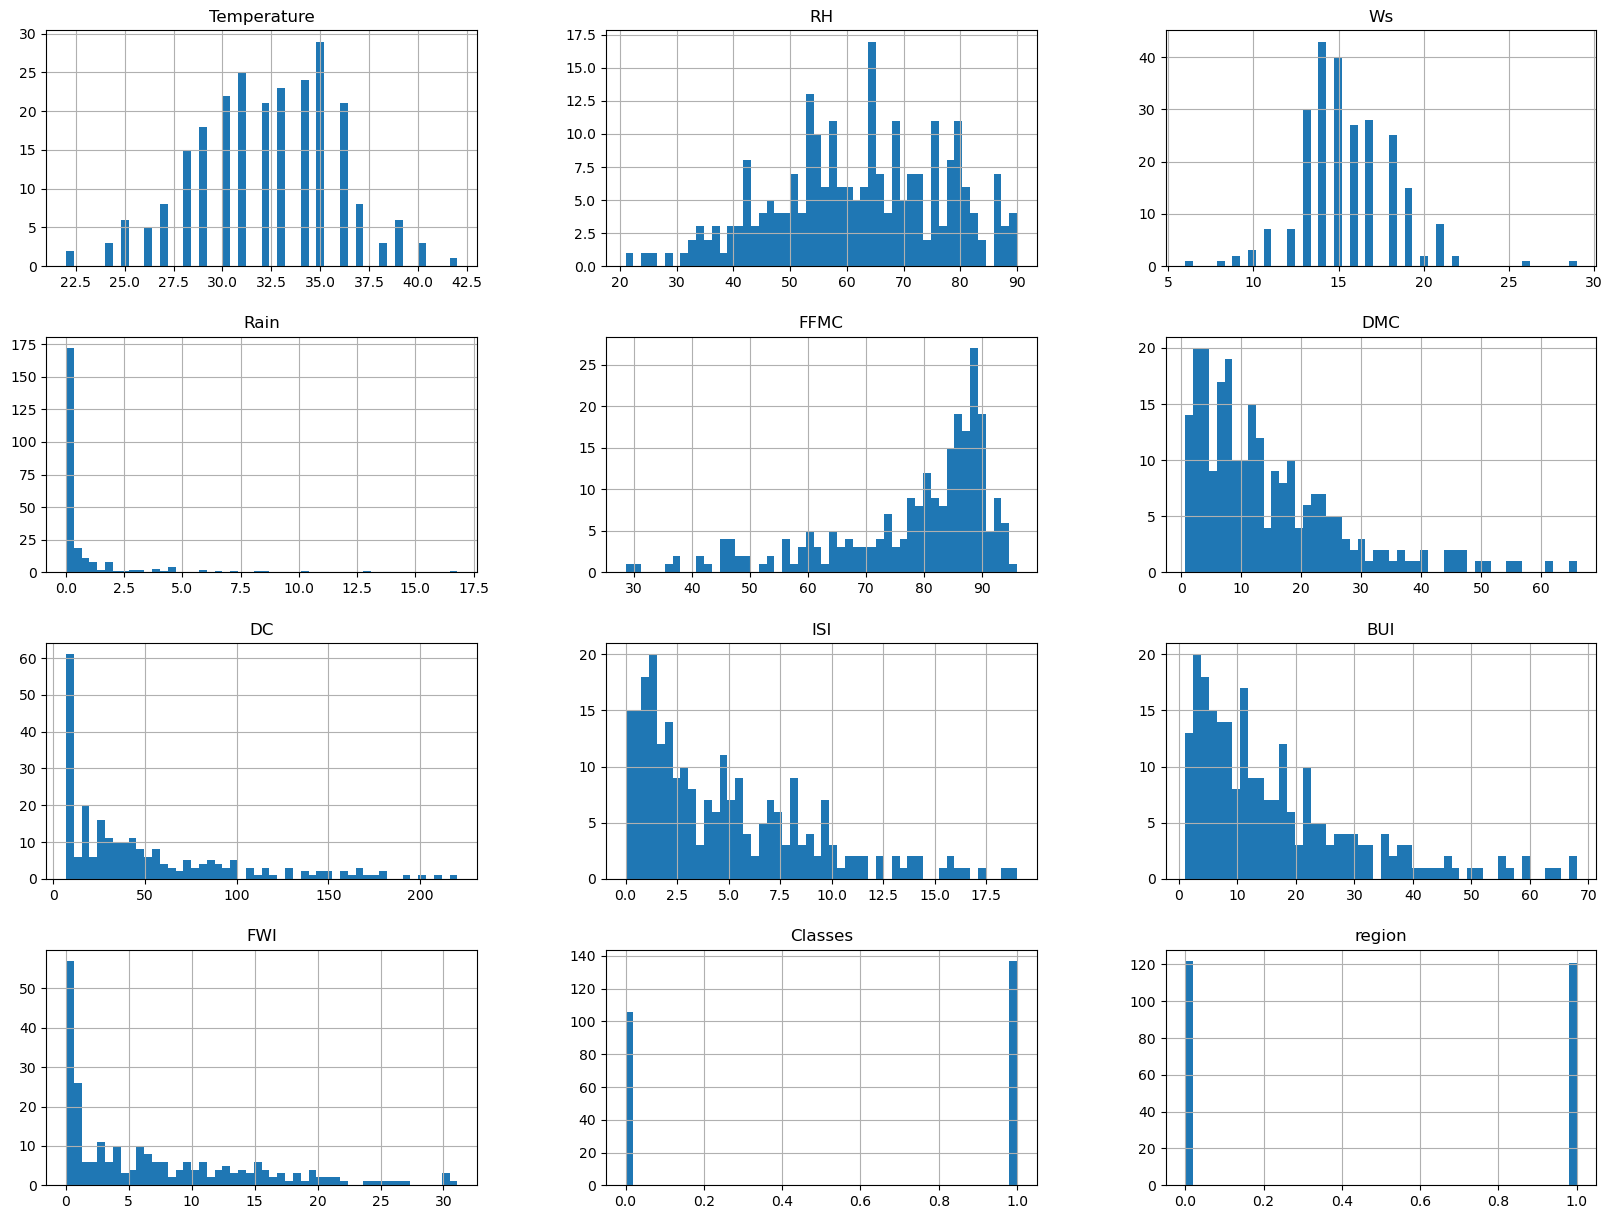

In [19]:
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

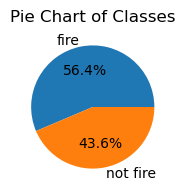

In [20]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100
classlabels=['fire','not fire']
plt.figure(figsize=(2,2))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie Chart of Classes')
plt.show()

In [21]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

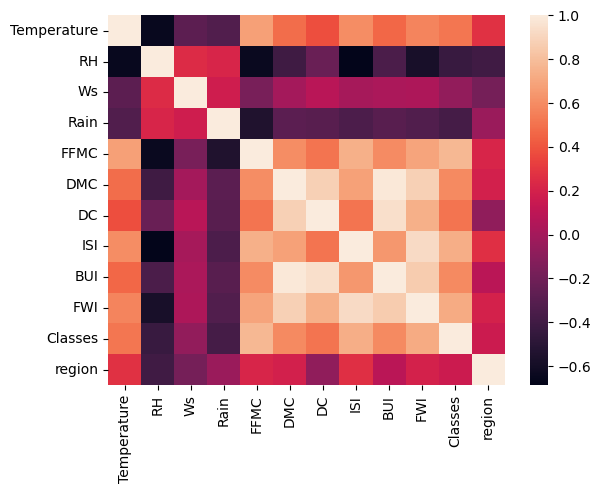

In [22]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

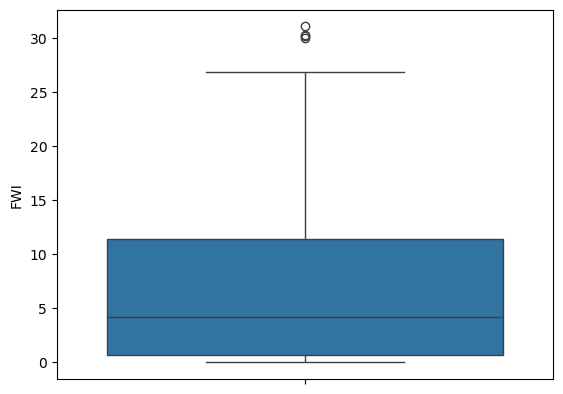

In [23]:
sns.boxplot(df_copy['FWI'])

In [24]:
df.Classes=df.Classes.str.strip()

Text(0, 0.5, 'number of fires')

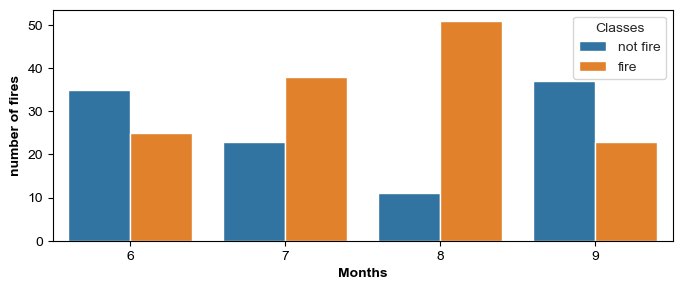

In [25]:
dftemp=df.loc[df['region']==1]
plt.subplots(figsize=(8,3))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.xlabel('Months',weight='bold')
plt.ylabel('number of fires',weight='bold')

### Model Training

In [26]:
df=pd.read_csv('../files/Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [28]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [30]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [31]:
df.Classes=df.Classes.map({
    'fire':1,
    'not fire':0
})
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [48]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [50]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

checking for mutlicolloinearity and if it's more than some threshold value then removing it

<Axes: >

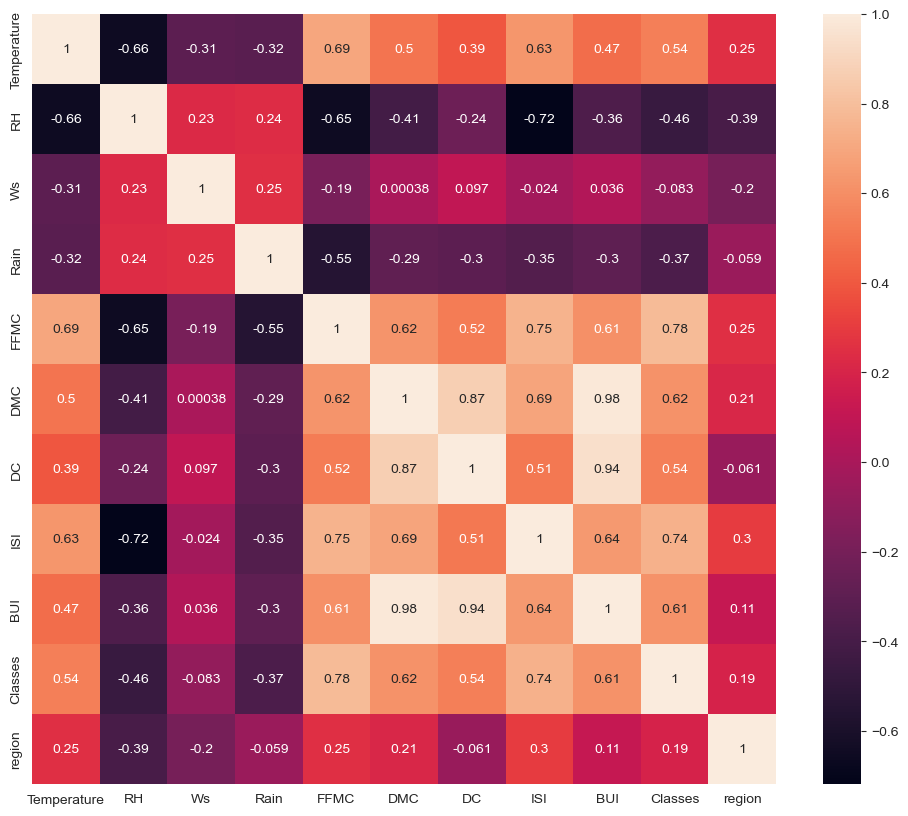

In [51]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [52]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [53]:
corr_features=correlation(X_train,0.85)

In [54]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

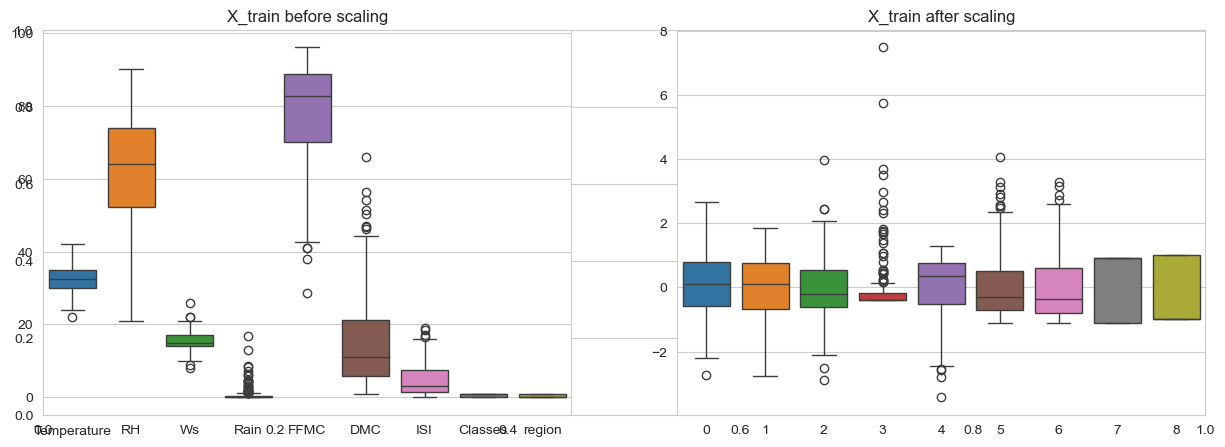

In [56]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

### Linear Regression Model

0.5468236465249978 0.9847657384266951


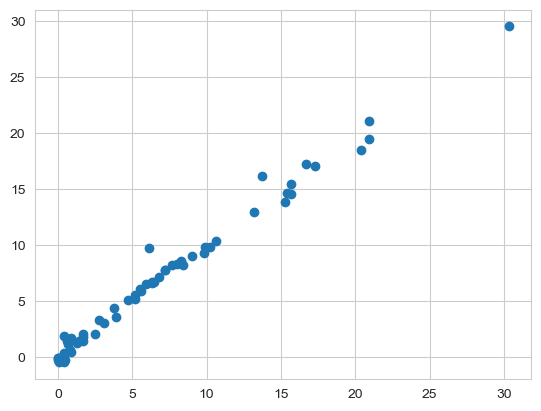

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

reg=LinearRegression()
reg.fit(X_train_scaled,y_train)
y_pred=reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,r2)
plt.scatter(y_test,y_pred)

### Lasso Regression

In [66]:
from sklearn.linear_model import LassoCV

lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
print("these many alpha value it tried:",len(lassocv.alphas_))
print(lassocv.alpha_)

these many alpha value it tried: 100
0.05725391318234408


this alpha value we can use in Lasso()

1.133175994914409 0.9492020263112388


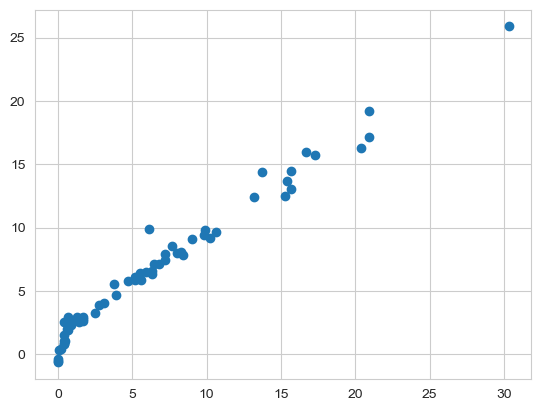

In [62]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

reg=Lasso()
reg.fit(X_train_scaled,y_train)
y_pred=reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,r2)
plt.scatter(y_test,y_pred)

### Ridge Regression

In [68]:
from sklearn.linear_model import RidgeCV

ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
print(ridgecv.alpha_)

1.0


0.56423053401057 0.9842993364555513


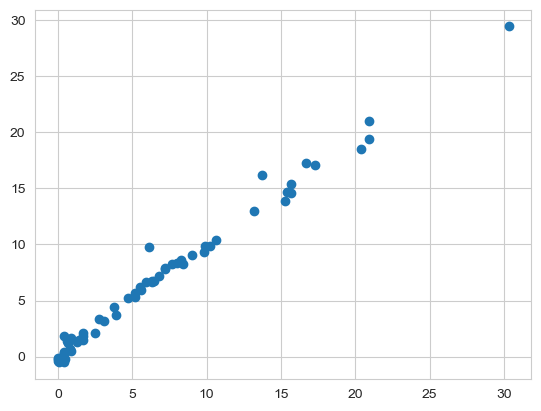

In [63]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

reg=Ridge()
reg.fit(X_train_scaled,y_train)
y_pred=reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,r2)
plt.scatter(y_test,y_pred)

### ElasticNet Regression

In [69]:
from sklearn.linear_model import ElasticNetCV

elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
print("these many alpha value it tried:",len(elasticnetcv.alphas_))
print(elasticnetcv.alpha_)

these many alpha value it tried: 100
0.04311146156383891


1.8822353634896 0.8753460589519703


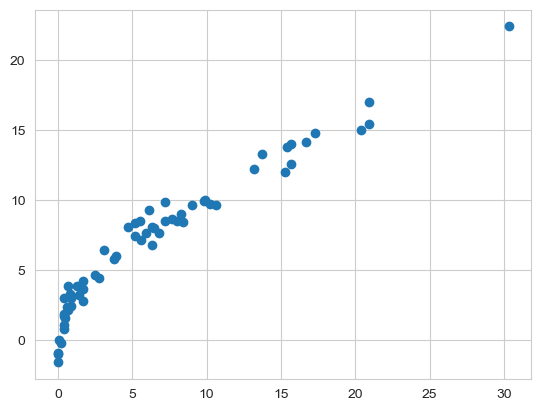

In [64]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

reg=ElasticNet()
reg.fit(X_train_scaled,y_train)
y_pred=reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mae,r2)
plt.scatter(y_test,y_pred)